### Generate Random Numbers to be used for the three sides of the triangle 

In [1]:
import numpy as np
import pandas as pd

In [2]:
def generate_normal_distribution(x, y, n):
    mean = (x + y) / 2
    std_dev = (y - x) / 6  # 99.7% of data within [x, y] for normal distribution
    return np.random.normal(mean, std_dev, n)

In [3]:
def generate_uniform_distribution(x, y, n):
    for i in range(1,n):
        random_number = np.random.uniform(x, y)
        return np.random.uniform(x, y, n)

In [4]:
# Example usage
n = 1000000
x = 1
y = 100

#numbers = generate_normal_distribution(x, y, n)
side_1 = generate_uniform_distribution(x, y, n)

s2min, s2max = 0.5,2.0
side_2 = side_1 * generate_uniform_distribution(s2min, s2max, n)

s3min, s3max = 0.3333,3.0
side_3 = side_1 * generate_uniform_distribution(s3min, s3max, n)

### Create Dataframe & EDA

In [5]:
# Convert the generated list into a pandas DataFrame
triangle_df = pd.DataFrame( {'A' : side_1, 'B' : side_2 , 'C' : side_3})

In [6]:
triangle_df.head(10)

,A,B,C
0,23.197131,24.928735,13.493317
1,79.258554,139.154995,77.850035
2,58.705789,42.532569,89.162366
3,10.177828,7.668567,28.413604
4,46.374285,80.219212,76.576095
5,45.058186,45.747714,126.978932
6,58.033777,94.851214,147.830825
7,11.936461,8.161706,28.392419
8,42.359400,82.249175,109.753942
9,89.396191,163.398324,202.690182


In [7]:
triangle_df.tail(10)

,A,B,C
999990,3.805142,2.060696,2.195558
999991,34.955004,18.624079,13.342408
999992,4.665573,6.451001,8.128848
999993,38.556913,61.125287,90.328237
999994,24.887612,44.057317,42.785208
999995,54.191038,29.535239,30.077797
999996,49.198129,50.058139,23.145855
999997,16.485701,26.350413,20.695435
999998,32.617874,54.993861,25.250784
999999,63.994083,125.886497,176.870820


In [8]:
triangle_df.shape

(1000000, 3)

In [9]:
triangle_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1000000 non-null  float64
 1   B       1000000 non-null  float64
 2   C       1000000 non-null  float64
dtypes: float64(3)
memory usage: 22.9 MB


In [10]:
triangle_df.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,50.466896,63.098651,84.058750
std,28.588280,43.723363,65.268276
min,1.000009,0.508470,0.359319
25%,25.700503,27.764772,31.180616
50%,50.451585,54.769995,67.259782
75%,75.224629,91.211271,124.246004
max,99.999957,199.817442,299.298760


In [11]:
triangle_df.columns

Index(['A', 'B', 'C'], dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

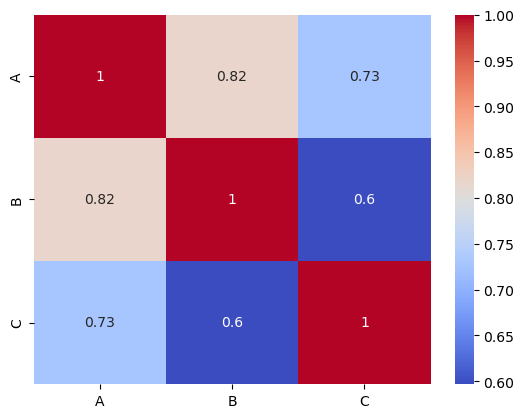

In [13]:
corr_matrix = triangle_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

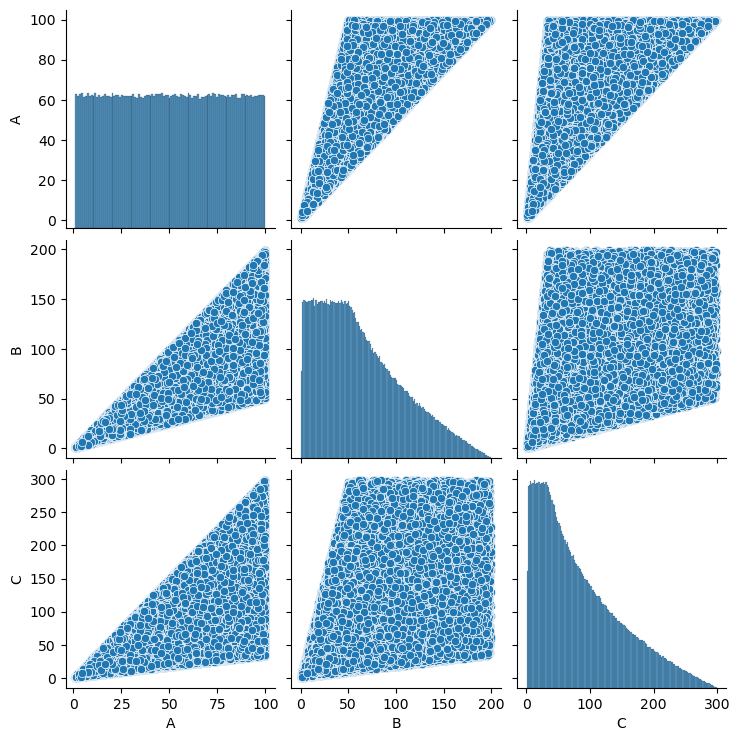

In [14]:
sns.pairplot(triangle_df)
plt.show()

### Generate the Target column (for if the three numbers can form a Triangle - can fit as three sides of a Traingle)

In [15]:
# Define a function to calculate the new column value
def can_form_triangle(row):
    #(a + b > c)
    #(a + c > b)
    #(b + c > a)
    if (row['A'] + row['B'] > row['C']) and (row['A'] + row['C'] > row['B']) and (row['C'] + row['B'] > row['A']):
        return True
    return False

In [16]:
# Apply the function to each row in the DataFrame to create the new column 'is a triangle'
triangle_df['can_form_triangle'] = triangle_df.apply(can_form_triangle, axis=1)

In [17]:
triangle_df.head()

,A,B,C,can_form_triangle
0,23.197131,24.928735,13.493317,True
1,79.258554,139.154995,77.850035,True
2,58.705789,42.532569,89.162366,True
3,10.177828,7.668567,28.413604,False
4,46.374285,80.219212,76.576095,True


In [18]:
triangle_df.tail()

,A,B,C,can_form_triangle
999995,54.191038,29.535239,30.077797,True
999996,49.198129,50.058139,23.145855,True
999997,16.485701,26.350413,20.695435,True
999998,32.617874,54.993861,25.250784,True
999999,63.994083,125.886497,176.870820,True


In [19]:
sum(triangle_df['can_form_triangle']==True)

659816

In [20]:
sum(triangle_df['can_form_triangle']==False)

340184

### Decision Tree Classification Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report

#### Split the data into features (X) and target (y).

In [22]:
# Split the data into features (X) and target (y)
X = triangle_df[['A', 'B', 'C']]
y = triangle_df['can_form_triangle']

#### Split the data into training and testing sets.

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Neither Normalization nor standardization are required here - preferred NOT to use any of them
##### Normalization scales the data to a range of [0, 1], while standardization scales the data to have a mean of 0 and a standard deviation of 1.

In [24]:
'''
# Choose either StandardScaler or MinMaxScaler for preprocessing
scaler = StandardScaler()  # For standardization
# scaler = MinMaxScaler()  # For normalization

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

'\n# Choose either StandardScaler or MinMaxScaler for preprocessing\nscaler = StandardScaler()  # For standardization\n# scaler = MinMaxScaler()  # For normalization\n\n# Fit the scaler on the training data and transform both training and testing data\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n'

#### Initialize and train a decision tree classifier.

In [25]:
# Initialize and train the classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

#### Make predictions on the test set.

In [26]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

#### Evaluate the model's performance using accuracy and a classification report.

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [28]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.98544
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     68025
        True       0.99      0.99      0.99    131975

    accuracy                           0.99    200000
   macro avg       0.98      0.98      0.98    200000
weighted avg       0.99      0.99      0.99    200000



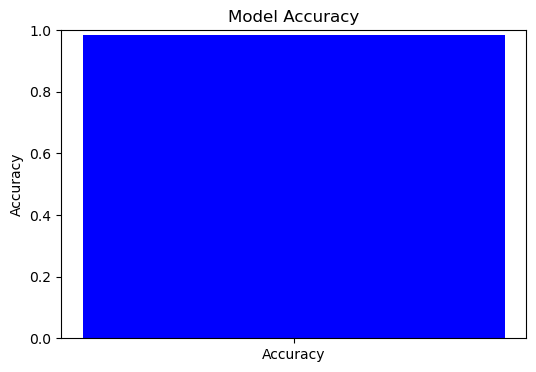

In [29]:
# Plotting the accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

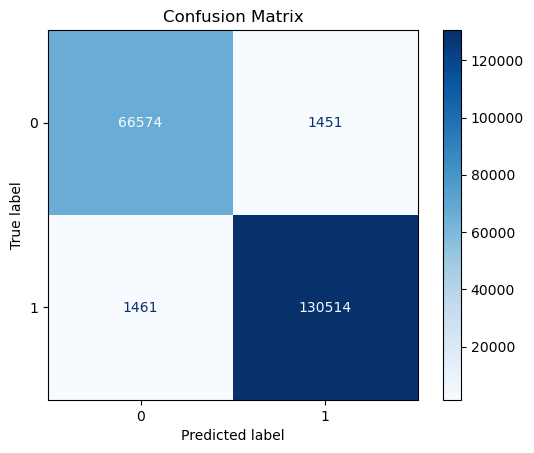

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Display the records with incorrect predictions
incorrect_predictions = X_test[y_test != y_pred]
incorrect_predictions['Actual'] = y_test[y_test != y_pred]
incorrect_predictions['Predicted'] = y_pred[y_test != y_pred]

print(incorrect_predictions)

                A           B           C  Actual  Predicted
517431  11.122681   22.146646   11.003210   False       True
259149  31.274955   59.155575   90.956925   False       True
151111  79.099847  107.163952   27.572696   False       True
920623  79.173224   40.131789   38.838070   False       True
332468  70.940100  123.848915   54.973066    True      False
...           ...         ...         ...     ...        ...
94624   50.384412   69.537822   20.609780    True      False
966026  85.185417  166.138957  251.763909   False       True
744324  30.935827   39.095981   70.180382   False       True
769058  13.179685   16.946571   30.033052    True      False
872709  57.578334   56.297181  114.071412   False       True

[2912 rows x 5 columns]


C:\Users\samwa\AppData\Local\Temp\1\ipykernel_6420\3322440075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_predictions['Actual'] = y_test[y_test != y_pred]
C:\Users\samwa\AppData\Local\Temp\1\ipykernel_6420\3322440075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_predictions['Predicted'] = y_pred[y_test != y_pred]


In [40]:
incorrect_predictions.shape

(2912, 5)

In [65]:
# Define a function to calculate the new column value
def calc_new_columns_for_diff(row):
    d1 = abs(min(0.0,row['A'] + row['B'] - row['C']))
    d1p = 100.0 * ((d1 / row['C']) if d1 > 0.0 else 0.0 )
    
    d2 = abs(min(0.0,row['A'] + row['C'] - row['B']))
    d2p = 100.0 * ((d2 / row['B']) if d2 > 0.0 else 0.0 )
    
    d3 = abs(min(0.0,row['C'] + row['B'] - row['A']))
    d3p = 100.0 * ((d3 / row['A']) if d3 > 0.0 else 0.0 )

    return pd.Series([round(max(d1,d2,d3),2), round(max(d1p,d2p,d3p),2)])

In [66]:
incorrect_predictions[['diff','diff_percentage']]=incorrect_predictions.apply(calc_new_columns_for_diff, axis=1)

C:\Users\samwa\AppData\Local\Temp\1\ipykernel_6420\1339787836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_predictions[['diff','diff_percentage']]=incorrect_predictions.apply(calc_new_columns_for_diff, axis=1)
C:\Users\samwa\AppData\Local\Temp\1\ipykernel_6420\1339787836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_predictions[['diff','diff_percentage']]=incorrect_predictions.apply(calc_new_columns_for_diff, axis=1)


In [67]:
incorrect_predictions.shape

(2912, 7)

In [68]:
incorrect_predictions

,A,B,C,Actual,Predicted,diff,diff_percentage
517431,11.122681,22.146646,11.003210,False,True,0.02,0.09
259149,31.274955,59.155575,90.956925,False,True,0.53,0.58
151111,79.099847,107.163952,27.572696,False,True,0.49,0.46
920623,79.173224,40.131789,38.838070,False,True,0.20,0.26
332468,70.940100,123.848915,54.973066,True,False,0.00,0.00
...,...,...,...,...,...,...,...
94624,50.384412,69.537822,20.609780,True,False,0.00,0.00
966026,85.185417,166.138957,251.763909,False,True,0.44,0.17
744324,30.935827,39.095981,70.180382,False,True,0.15,0.21
769058,13.179685,16.946571,30.033052,True,False,0.00,0.00


In [37]:
# Display the decision tree rules
tree_rules = export_text(clf, feature_names=['A', 'B', 'C'])
print(tree_rules)

|--- C <= 150.68
|   |--- B <= 50.48
|   |   |--- C <= 73.61
|   |   |   |--- B <= 25.72
|   |   |   |   |--- C <= 36.84
|   |   |   |   |   |--- B <= 13.21
|   |   |   |   |   |   |--- C <= 18.64
|   |   |   |   |   |   |   |--- B <= 6.46
|   |   |   |   |   |   |   |   |--- C <= 8.83
|   |   |   |   |   |   |   |   |   |--- B <= 2.92
|   |   |   |   |   |   |   |   |   |   |--- C <= 4.29
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- C >  4.29
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |--- B >  2.92
|   |   |   |   |   |   |   |   |   |   |--- C <= 1.60
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- C >  1.60
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |--- C >  8.83
|   |   |   |   |   |   |   |   

In [38]:
# Running below code resulted in a visula representation of the decision tree that is not clear (too dense) 
# due to the large number of points (1 M points)
'''
# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=['A', 'B', 'C'], class_names=['False', 'True'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()
'''



"\n# Visualize the decision tree\nplt.figure(figsize=(20, 12))\nplot_tree(clf, feature_names=['A', 'B', 'C'], class_names=['False', 'True'], filled=True)\nplt.title('Decision Tree Visualization')\nplt.show()\n"

#### Ref to improve accuracy of the decision tree and it may also fix above issue (enhancement)

[Overfitting and Pruning in Decision Trees — Improving Model’s Accuracy](https://medium.com/nerd-for-tech/overfitting-and-pruning-in-decision-trees-improving-models-accuracy-fdbe9ecd1160)

### There are several other methods that can be used for classification besides decision trees. Here are some popular ones, including Support Vector Machines (SVM):

1. **Support Vector Machines (SVM)**:
   - SVMs are powerful for both linear and non-linear classification. They work by finding the hyperplane that best separates the classes in the feature space. For non-linear classification, SVMs use kernel functions to transform the data into a higher-dimensional space where a linear separator can be found.

2. **Logistic Regression**:
   - Despite its name, logistic regression is a classification algorithm. It models the probability that a given input belongs to a particular class. It's particularly useful for binary classification problems.

3. **k-Nearest Neighbors (k-NN)**:
   - This is a simple, instance-based learning algorithm. It classifies a data point based on how its neighbors are classified. The class of a data point is determined by the majority class among its k nearest neighbors.

4. **Random Forest**:
   - An ensemble method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. It reduces overfitting by averaging the results of many decision trees.

5. **Naive Bayes**:
   - Based on Bayes' theorem, this algorithm assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. It's particularly effective for text classification problems.

6. **Gradient Boosting Machines (GBM)**:
   - An ensemble technique that builds models sequentially, each new model correcting errors made by the previous ones. Examples include XGBoost, LightGBM, and CatBoost.

7. **Neural Networks**:
   - Particularly useful for complex datasets and problems where feature engineering is difficult. Deep learning models, such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), are subsets of neural networks used for specific types of data like images and sequences.

8. **Linear Discriminant Analysis (LDA)**:
   - A method used to find a linear combination of features that best separates two or more classes. It's particularly useful when the classes are well-separated.

Each of these methods has its strengths and weaknesses, and the choice of algorithm can depend on the specific characteristics of your dataset and the problem you're trying to solve. SVMs, for example, are great for high-dimensional spaces and cases where the number of dimensions exceeds the number of samples.

Would you like to see an example of how to implement any of these methods in Python?

Sure! Here's an example of how you can use a Support Vector Machine (SVM) for classification using Python and the `scikit-learn` library. This example includes data preprocessing, training the SVM model, and evaluating its performance.

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 6, 7, 8, 9],
    'feature3': [9, 8, 7, 6, 5],
    'target': [True, False, True, False, True]
}
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df[['feature1', 'feature2', 'feature3']]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM classifier
svm = SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Display the records with incorrect predictions
incorrect_predictions = X_test[y_test != y_pred]
incorrect_predictions['Actual'] = y_test[y_test != y_pred]
incorrect_predictions['Predicted'] = y_pred[y_test != y_pred]

print(incorrect_predictions)
```

In this code:
- We create a sample DataFrame with features and a target column.
- We split the data into training and testing sets.
- We standardize the features using `StandardScaler`.
- We initialize and train an SVM classifier with a linear kernel. You can experiment with other kernels like 'rbf' (Radial Basis Function) or 'poly' (polynomial).
- We make predictions on the test set and evaluate the model's accuracy.
- We plot the confusion matrix to visualize the performance.
- We display the records with incorrect predictions.

Feel free to ask if you have any other questions or need further assistance!